In [1]:
import mxnet as mx
import numpy as np


In [2]:
#Training data
train_data = np.random.uniform(0, 1, [100, 2])
train_label = np.array([train_data[i][0] + 2 * train_data[i][1] for i in range(100)])
batch_size = 1

#Evaluation Data
eval_data = np.array([[7,2],[6,10],[12,2]])
eval_label = np.array([11,26,16])


In [3]:
train_iter = mx.io.NDArrayIter(train_data,train_label, batch_size, shuffle=True,label_name='lin_reg_label')
eval_iter = mx.io.NDArrayIter(eval_data, eval_label, batch_size, shuffle=False)


In [4]:
X = mx.sym.Variable('data')
Y = mx.symbol.Variable('lin_reg_label')
fully_connected_layer  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 1)
lro = mx.sym.LinearRegressionOutput(data=fully_connected_layer, label=Y, name="lro")


In [5]:
model = mx.mod.Module(
    symbol = lro ,
    data_names=['data'],
    label_names = ['lin_reg_label']# network structure
)


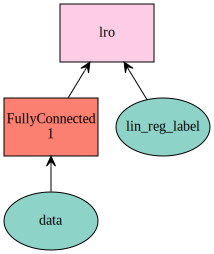

In [6]:
mx.viz.plot_network(symbol=lro)

In [15]:
model.fit(train_iter, eval_iter,
            optimizer_params={'learning_rate':0.005, 'momentum': 0.9},
            num_epoch=1000,
            batch_end_callback = mx.callback.Speedometer(batch_size, 2))


In [16]:
model.predict(eval_iter).asnumpy()

array([[ 10.99997902],
       [ 25.99991035],
       [ 15.9999733 ]], dtype=float32)

In [17]:
metric = mx.metric.MSE()
model.score(eval_iter, metric)


[('mse', 0.01000923446069161)]

In [18]:
eval_data = np.array([[7,2],[6,10],[12,2]])
eval_label = np.array([11.1,26.1,16.1]) #Adding 0.1 to each of the values
eval_iter = mx.io.NDArrayIter(eval_data, eval_label, batch_size, shuffle=False)
model.score(eval_iter, metric)


[('mse', 0.01000923446069161)]

In [14]:
model.fit(train_iter,
        eval_data=eval_iter,
        optimizer='sgd',
        optimizer_params={'learning_rate':0.1},
        eval_metric='acc',
        num_epoch=8)

/home/hades/machinelearning/MXNet/mxnet/python/mxnet/module/base_module.py:448: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)


In [20]:
model.score(eval_iter, ['mse', 'acc'])

[('mse', 0.01000923446069161), ('accuracy', 0.0)]

In [22]:
print (model)